In [1]:
import sys
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze, INF

from heapq import heappush, heappop

In [2]:
def heuristic(src, dst):
    # Manhattan Distance
    return abs(src[0]-dst[0])+abs(src[1]-dst[1])

In [ ]:
def add_to_beam(beam, new):
    if(beam[-1][0] > new[0]):
        beam = beam[:-1]
        beam.append(new)
    beam.sort()
    return beam

In [33]:
def beam_search(maze, start, goal, beam_width):
    # Declarations
    neighbors = [(1,0,"S"),(-1,0,"N"),(0,1,"E"),(0,-1,"W")]
    visited=set()
    cameFrom={}
    gScore={start:0}
    fScore={start:Heuristic(start, goal)}
    beam = []
    # Initialising the proprity queue with the start node and its f score
    beam.append((fScore[start],start))
    # Looping till the priority queue is empty
    while beam:
        current = beam.pop()[1]
        # Stops and returns the path if the current node is the target node
        if current == goal:
            path=[]
            while current in cameFrom:
                path.append(current)
                current = cameFrom[current]
            path = path + [start]
            path = path[::-1]
            return path 
        # Marking current node as visited
        visited.add(current)

        for i,j,k in neighbors:
            neighbor=(current[0]+i, current[1]+j)
            # Checking if the neighbor is out of bounds or if the path to the neighbor is blocked
            if neighbor[0] < 0 or neighbor[0] >= len(maze.grid[0]):
                continue
            if neighbor[1] < 0 or neighbor[1] >= len(maze.grid):
                continue
            if maze.grid[current[0]][current[1]].neighbors[k] == INF:
                continue
            # Caloculating g and f scores
            tentative_gScore = gScore[current] + maze.grid[current[0]][current[1]].neighbors[k]
            tentative_fScore = tentative_gScore + Heuristic(neighbor, goal)
            # Checking if the current f score is less than or equal to the calculated one
            if neighbor in visited and tentative_fScore >= fScore.get(neighbor, INF):
                continue
            # Checking if the current f score is greater than the calculated one
            if tentative_fScore < fScore.get(neighbor, INF):
                cameFrom[neighbor] = current
                gScore[neighbor] = tentative_gScore
                fScore[neighbor] = tentative_fScore
                
                # If beam is at maximum width, check if current neighbor should be inserted 
                if(len(beam) == beam_width):
                    if(beam[-1][0] > fScore[neighbor]):
                        beam[-1] = (fScore[neighbor], neighbor)
                else:
                    beam.append((fScore[neighbor], neighbor))
                    
            #Resort the beam
            beam.sort()
    return False    # Path does not exist

Path: 
[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 8), (7, 8), (7, 9), (7, 10), (8, 10), (9, 10), (9, 11), (9, 12), (10, 12), (11, 12), (11, 13), (11, 14), (12, 14), (13, 14), (13, 15), (14, 15), (15, 15)]


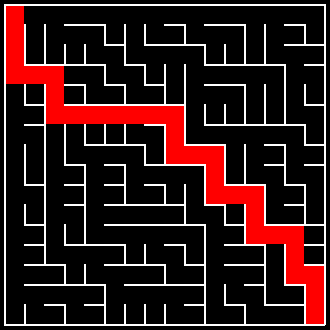

In [37]:
maze = Maze()
maze.load("BinaryTree_16x16.maze")

start = (0, 0)
goal = (15, 15)

print("Path: ")
path = beam_search(maze, start, goal, 6)
if path==False:
    print("No path exists")
else:
    print(path)
    
maze.add_colors(path=path)
display(maze.draw(cell_width=20))